In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random
import seaborn as sns
plt.style.use('seaborn')
import warnings
warnings.simplefilter('ignore')

from sklearn.cluster import KMeans

In [4]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=['SL', 'SW', 'PL', 'PW'])
data.head()

,SL,SW,PL,PW
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
sepals = data[['SL', 'SW']]
sepals

,SL,SW
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [6]:
petals = data[['PL', 'PW']]
petals

,PL,PW
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Все данные без разбиения на кластеры:

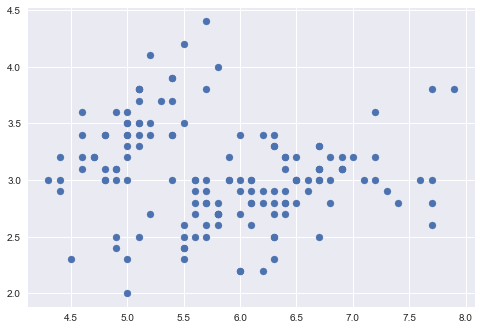

In [7]:
plt.scatter(sepals.SL, sepals.SW);

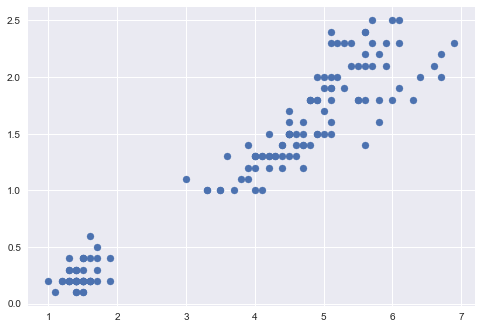

In [8]:
plt.scatter(petals.PL, petals.PW);

In [43]:
def kmeans(data, n_clusters):
    rows, cols = data.shape[0], data.shape[1]
    centroids = []
    old_centroids = [list(np.zeros(cols)) for i in range(n_clusters)]
    cluster = []
    
    temp = data.copy()
    for i in range(n_clusters):
        centroids.append([random.randint(int(min(data.iloc[:, 0])), int(max(data.iloc[:, 0]))),
                          random.randint(int(min(data.iloc[:, 1])), int(max(data.iloc[:, 1])))])
    
    while np.all(centroids == old_centroids) != True:
        cluster = []

        for i in range(rows):
            distance = []
            for j in range(n_clusters):
                distance.append((((data.iloc[i].values[0] - centroids[j][0])**2) + \
                                 ((data.iloc[i].values[1] - centroids[j][1])**2))**0.5)
            cluster.append(distance.index(min(distance)))
        
        old_centroids = centroids
        
        temp['Cluster'] = cluster
        
        points = []
        for i in range(n_clusters):
            x = 0
            y = 0
            q = temp[temp['Cluster'] == i]
            points.append([np.mean(q.iloc[:, 0]), np.mean(q.iloc[:, 1])])
        centroids = points
    data['Type'] = cluster
    
    return data

### Кластеризация по параметрам лепестков (с 2 и 3 кластерами):

In [44]:
petals_clustered = kmeans(petals, 2)
petals_clustered

,PL,PW,Type
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,1
147,5.2,2.0,1
148,5.4,2.3,1


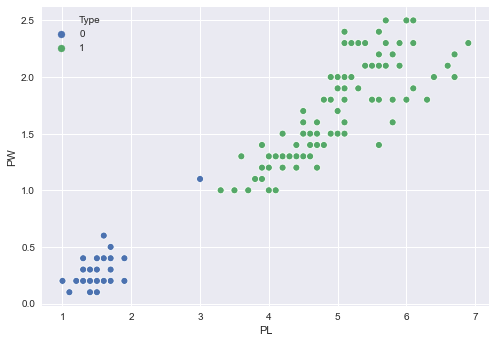

In [45]:
sns.scatterplot(petals_clustered['PL'], petals_clustered['PW'], petals_clustered['Type']);

In [23]:
petals_clustered = kmeans(petals, 3)

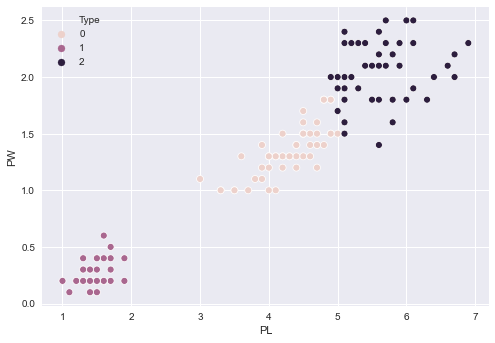

In [24]:
sns.scatterplot(petals_clustered['PL'], petals_clustered['PW'], petals_clustered['Type']);

### Кластеризация по параметрам чашелистиков (с 3 и 4 кластерами):

In [25]:
sepals_clustered = kmeans(sepals, 3)

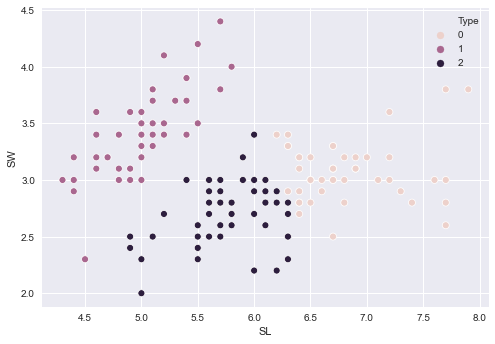

In [28]:
sns.scatterplot(sepals_clustered['SL'], sepals_clustered['SW'], sepals_clustered['Type']);

In [30]:
sepals_clustered = kmeans(sepals, 4)

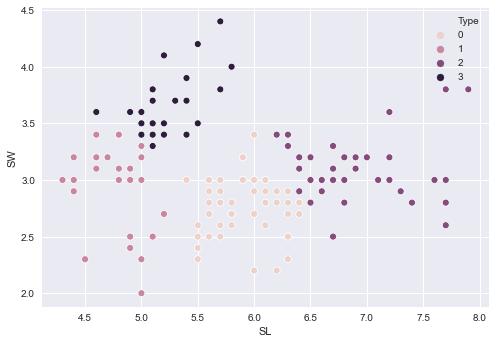

In [31]:
sns.scatterplot(sepals_clustered['SL'], sepals_clustered['SW'], sepals_clustered['Type']);

### Выясним, какое количество кластеров будет оптимальным

In [37]:
def evaluate_sse(data):
    sse = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        data['clusters'] = kmeans.labels_
        sse[k] = kmeans.inertia_

    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel('Number of clusters')
    plt.ylabel('SSE')
    plt.show()

In [39]:
X = pd.DataFrame(iris.data, columns=iris['feature_names'])
sepals_data = X[['sepal length (cm)', 'sepal width (cm)']]

### Три кластера понизят SSE на треть, имеет смысл разбить данные именно так

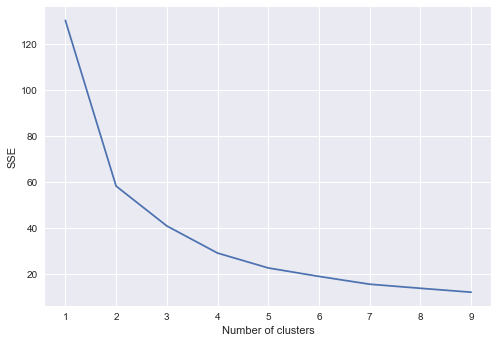

In [40]:
evaluate_sse(sepals_data)

In [41]:
petals_data = X[['petal length (cm)', 'petal width (cm)']]

### Здесь достаточно двух кластеров

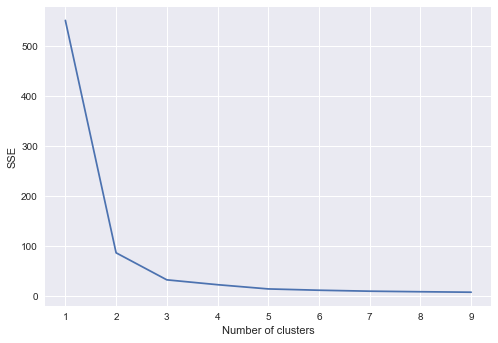

In [42]:
evaluate_sse(petals_data)